In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter 
from plotly import express as px

plt.style.use('ggplot')

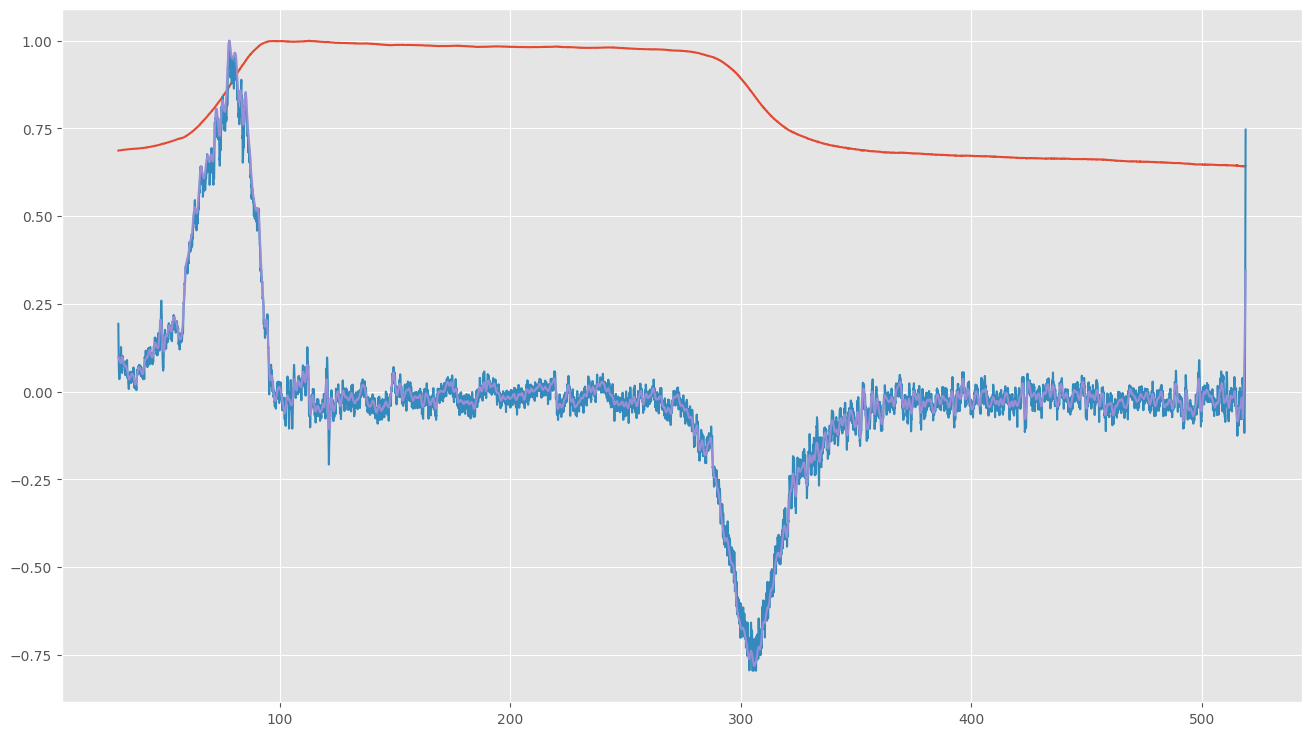

In [66]:
k=10
df=pd.read_csv(f'peltier_cosas/peltiermod{k}.csv')
t=np.array(range(len(df)))
df_video=pd.read_csv(f'procesados/video{k}_Lab_sliced_cut.csv')

y=df_video['L']
t=df_video['t']
t=t[30*25:-25]
y=y[30*25:-25]


y_smooth = savgol_filter(y,60,5)
# dy = np.gradient(y,t)
dy_smooth = np.gradient(y_smooth,t)
dy_smooth_smooth = savgol_filter(dy_smooth,60,2)

plt.figure(figsize=(16,9))
# plt.plot(t,dy)
plt.plot(t,y/np.max(y))
plt.plot(t,dy_smooth/np.max(dy_smooth))
plt.plot(t,dy_smooth_smooth/np.max(dy_smooth_smooth))


In [ ]:
low=17
high=20
dashdash='--'
color = 'verde'
k=low
df=pd.read_csv(f'peltier_cosas/peltiermod{k}.csv')
t=np.array(range(len(df)))
df_video=pd.read_csv(f'procesados/video{k}_Lab_sliced_cut.csv')

print(df)
print(df_video)



       t  temp
0      0  14.1
1      1  14.1
2      2  14.1
3      3  14.2
4      4  14.2
..   ...   ...
221  221  -4.7
222  222  -6.0
223  223  -7.1
224  224  -8.1
225  225  -8.5

[226 rows x 2 columns]
           t           L           a           b
0       0.00  162.392771  150.260738  161.607968
1       0.04  162.362595  150.255081  161.625113
2       0.08  162.464382  150.274164  161.612344
3       0.12  162.556025  150.286466  161.600444
4       0.16  162.434433  150.271973  161.619694
...      ...         ...         ...         ...
7110  284.40  230.590167  165.446725  174.719221
7111  284.44  230.470106  165.412750  174.740958
7112  284.48  230.510412  165.522184  174.667906
7113  284.52  230.545286  165.432809  174.688014
7114  284.56  230.524114  165.424911  174.690138

[7115 rows x 4 columns]


C:\Users\soysa\AppData\Local\Temp\ipykernel_3268\3879171423.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,9))


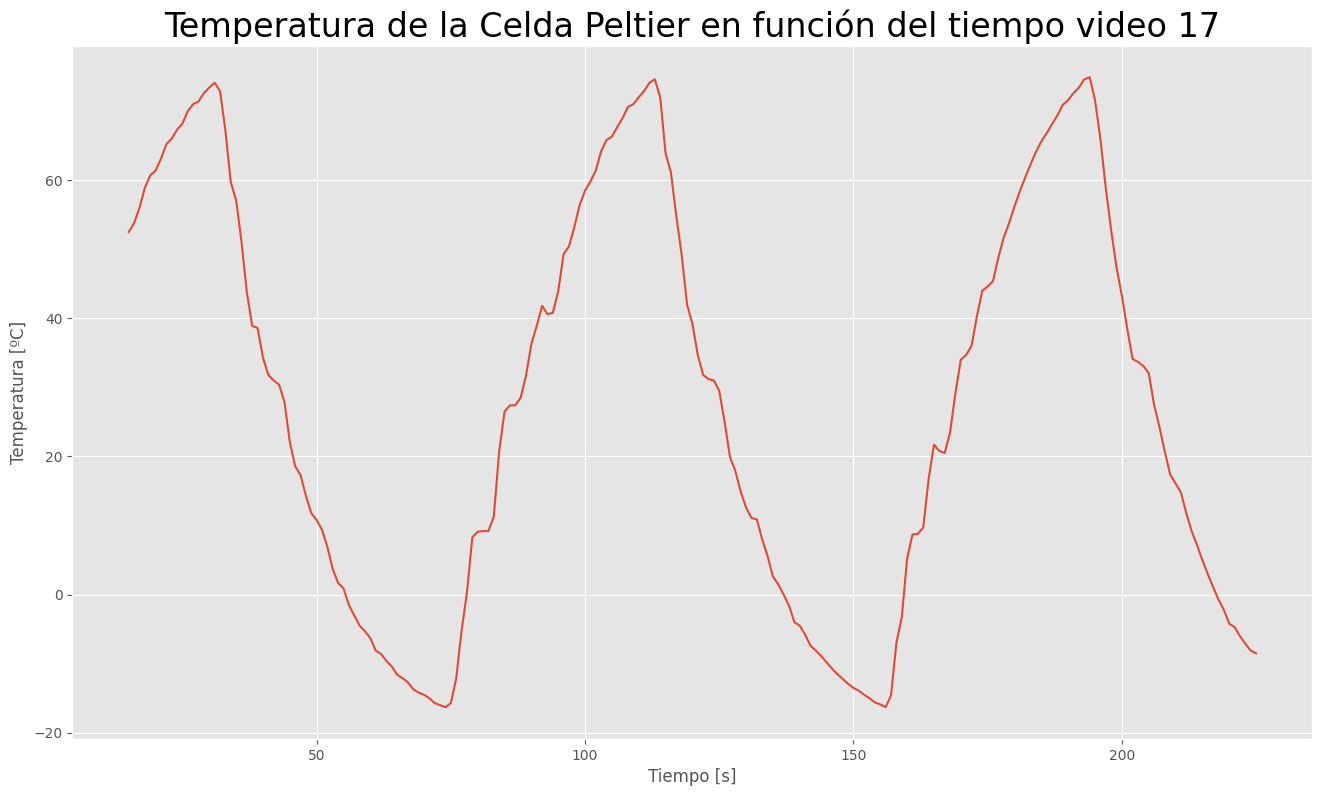

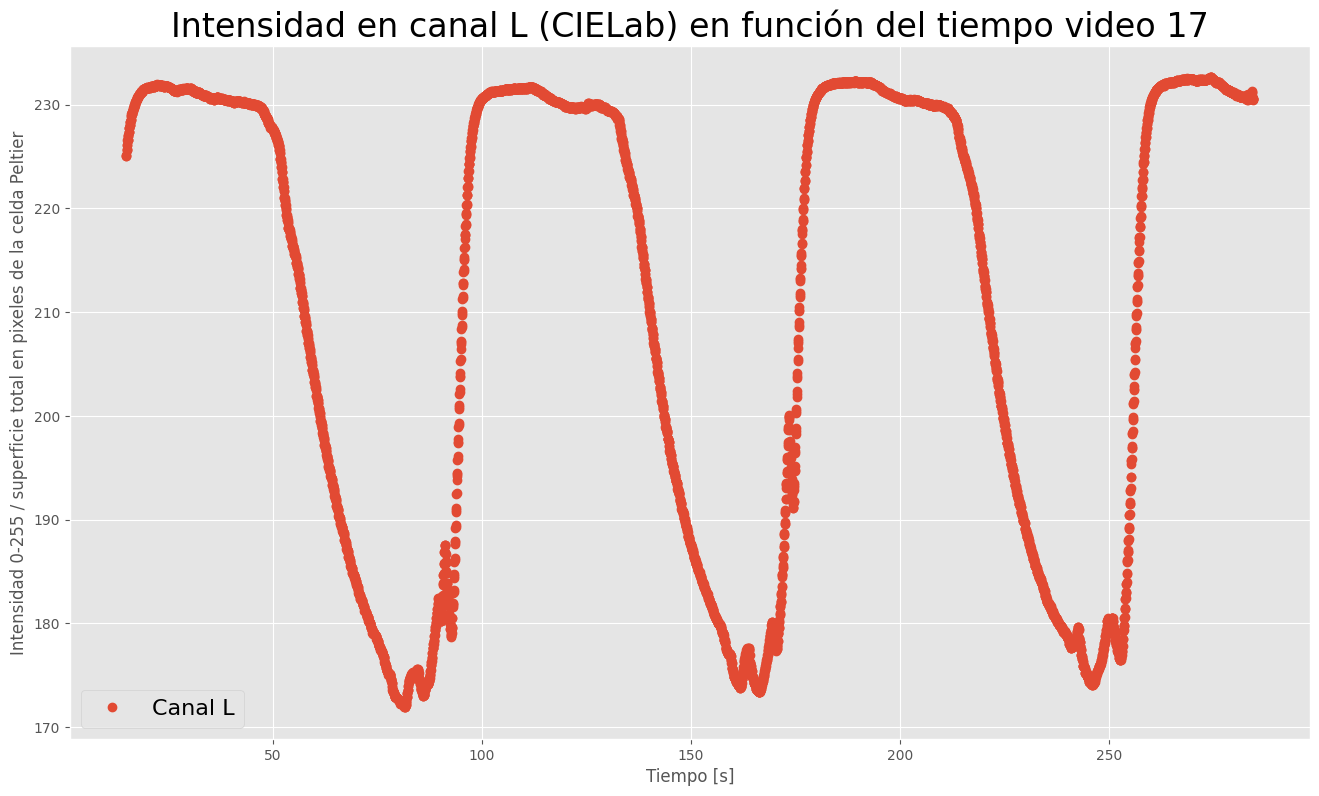

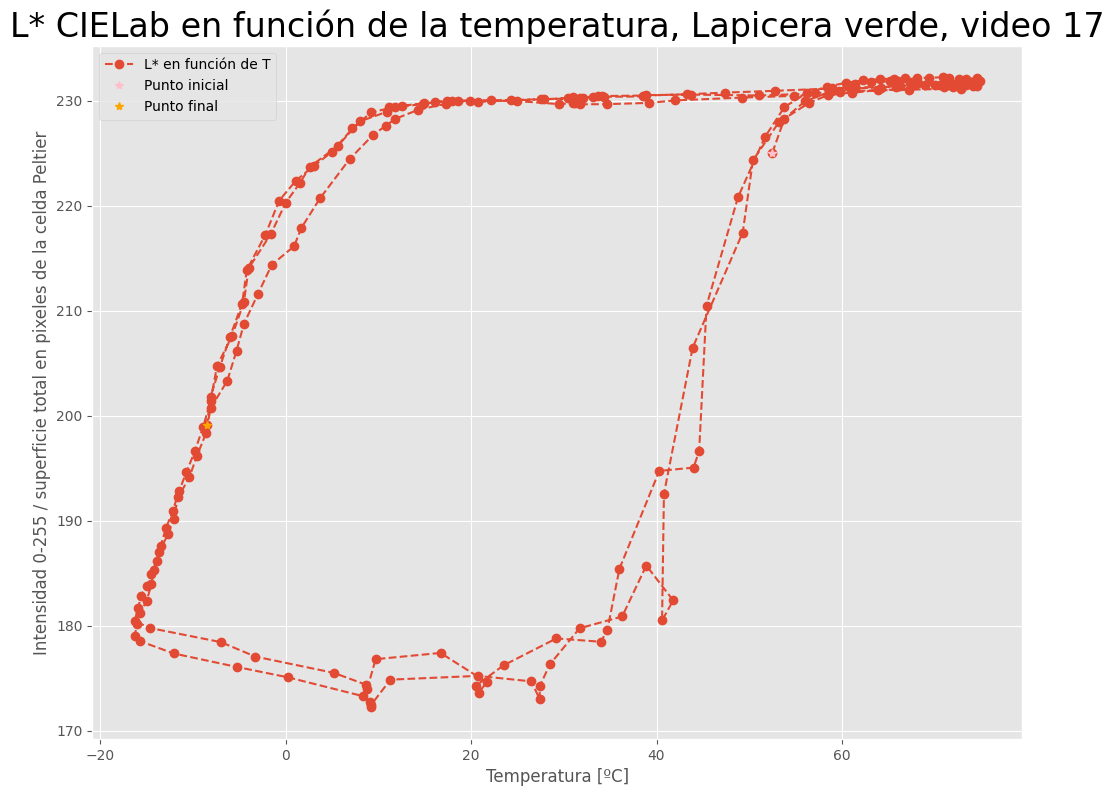

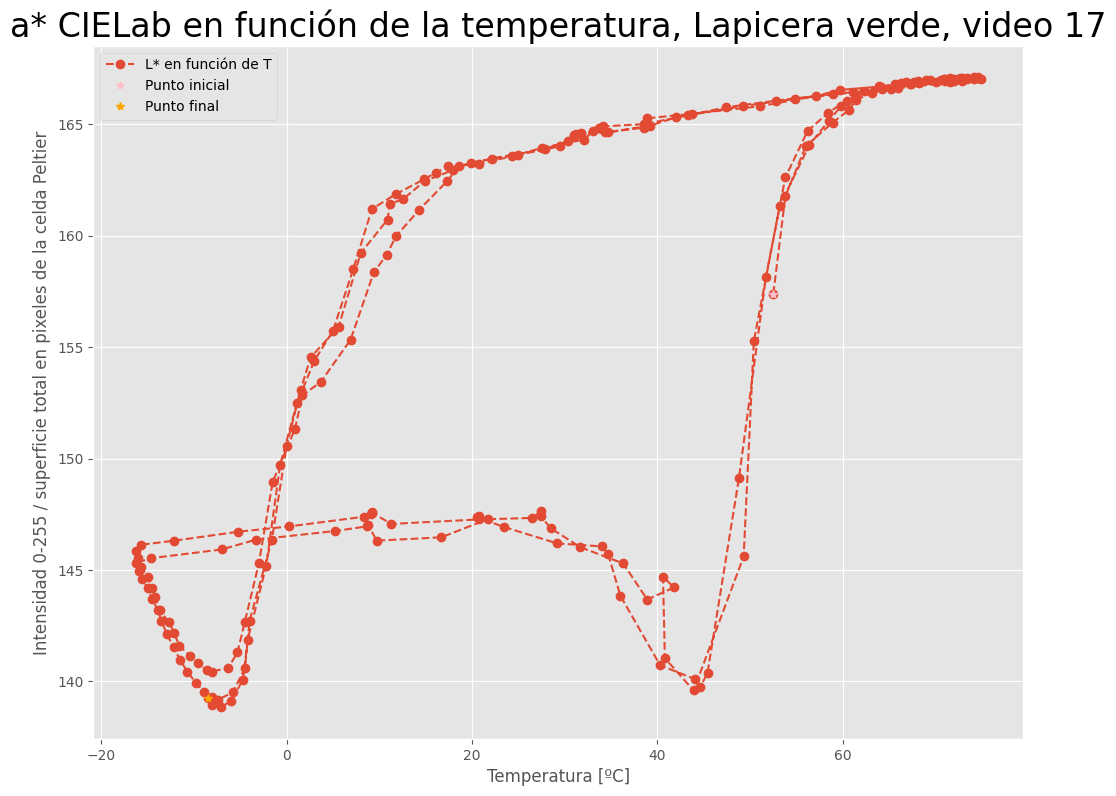

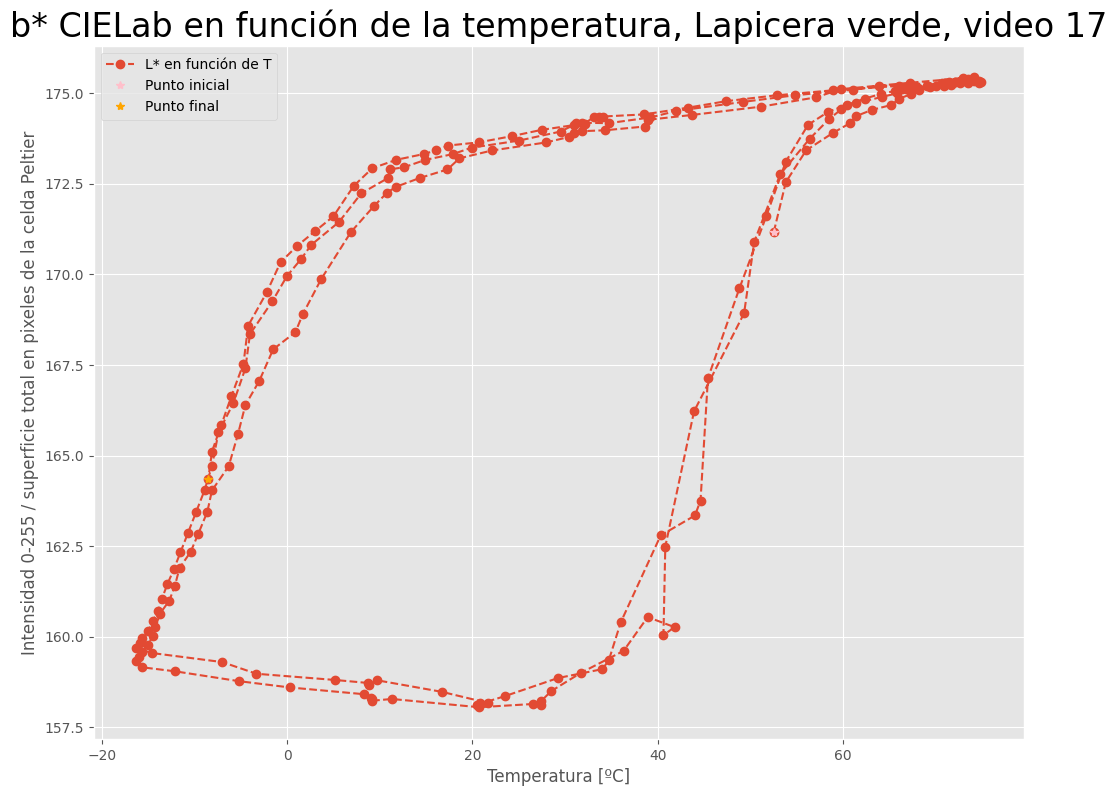

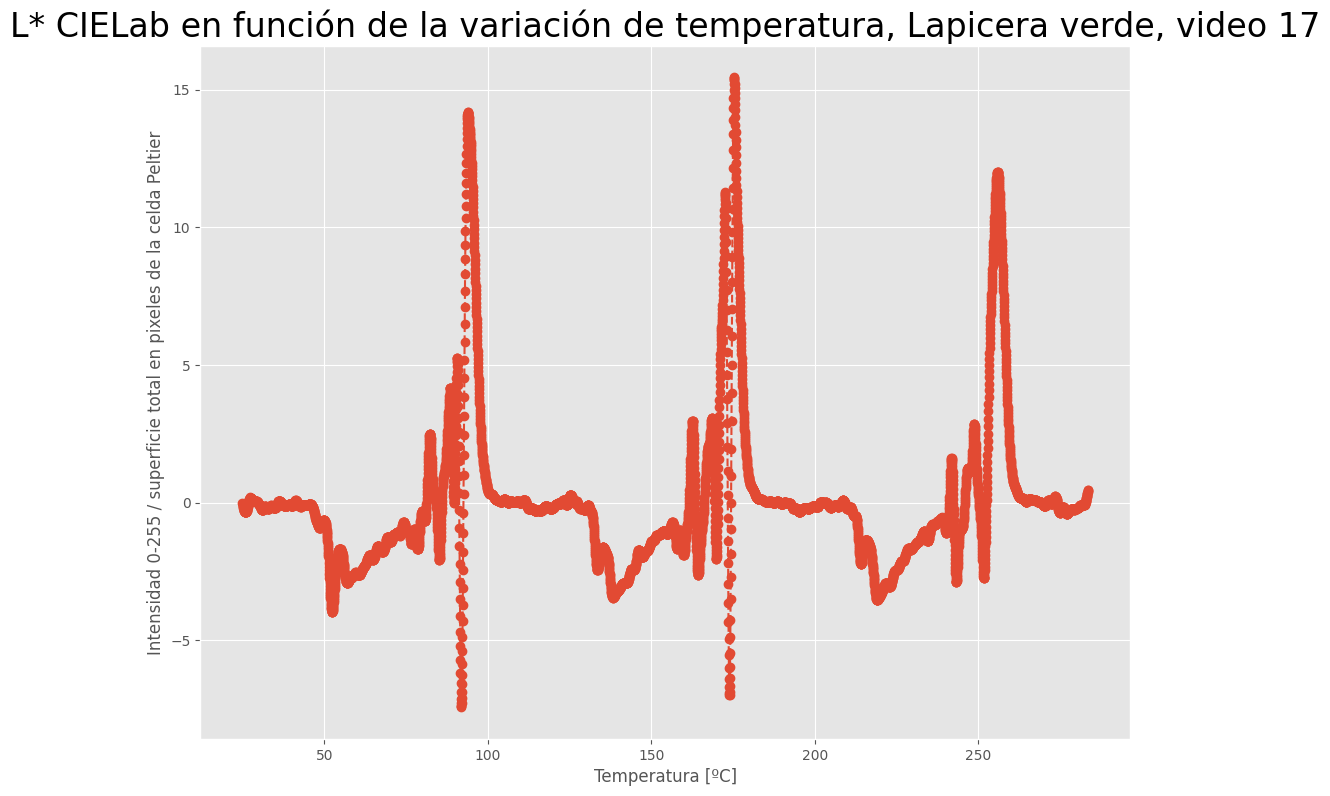

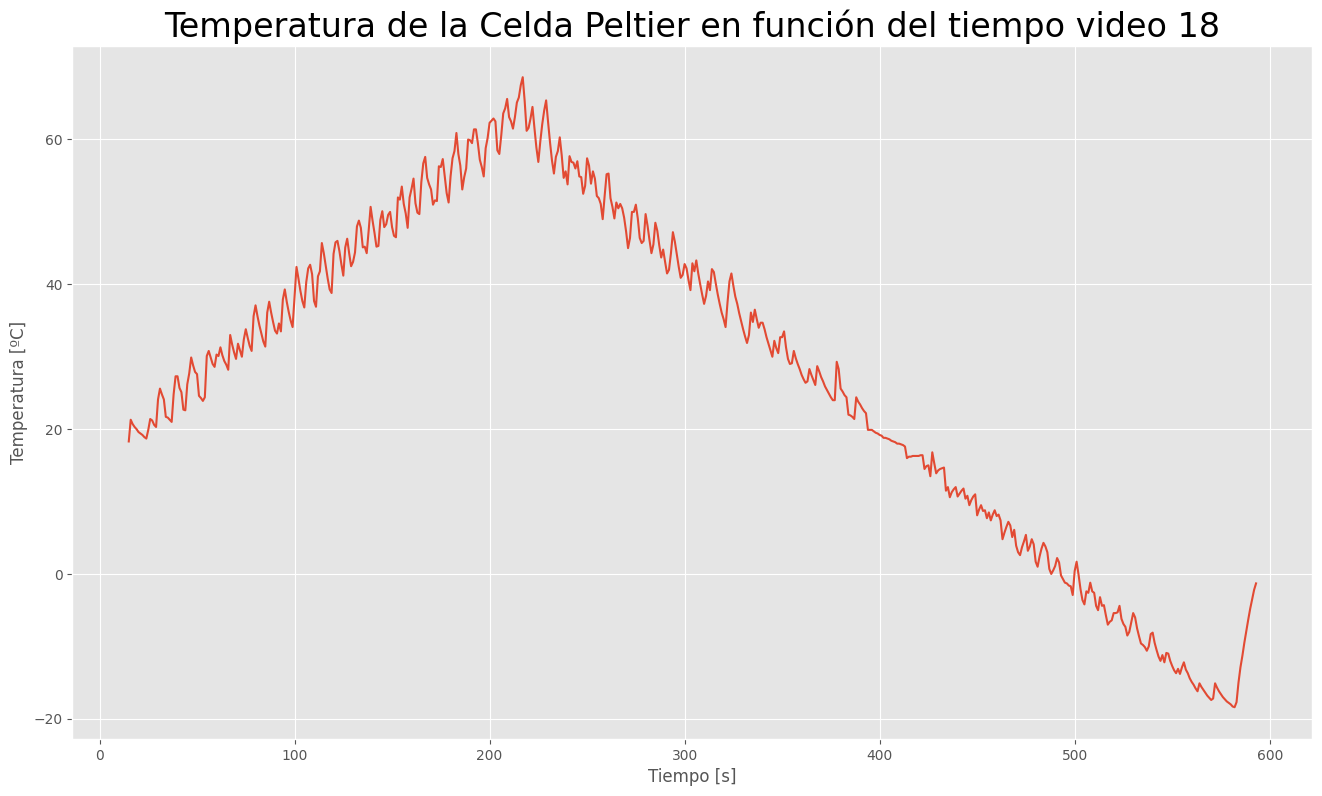

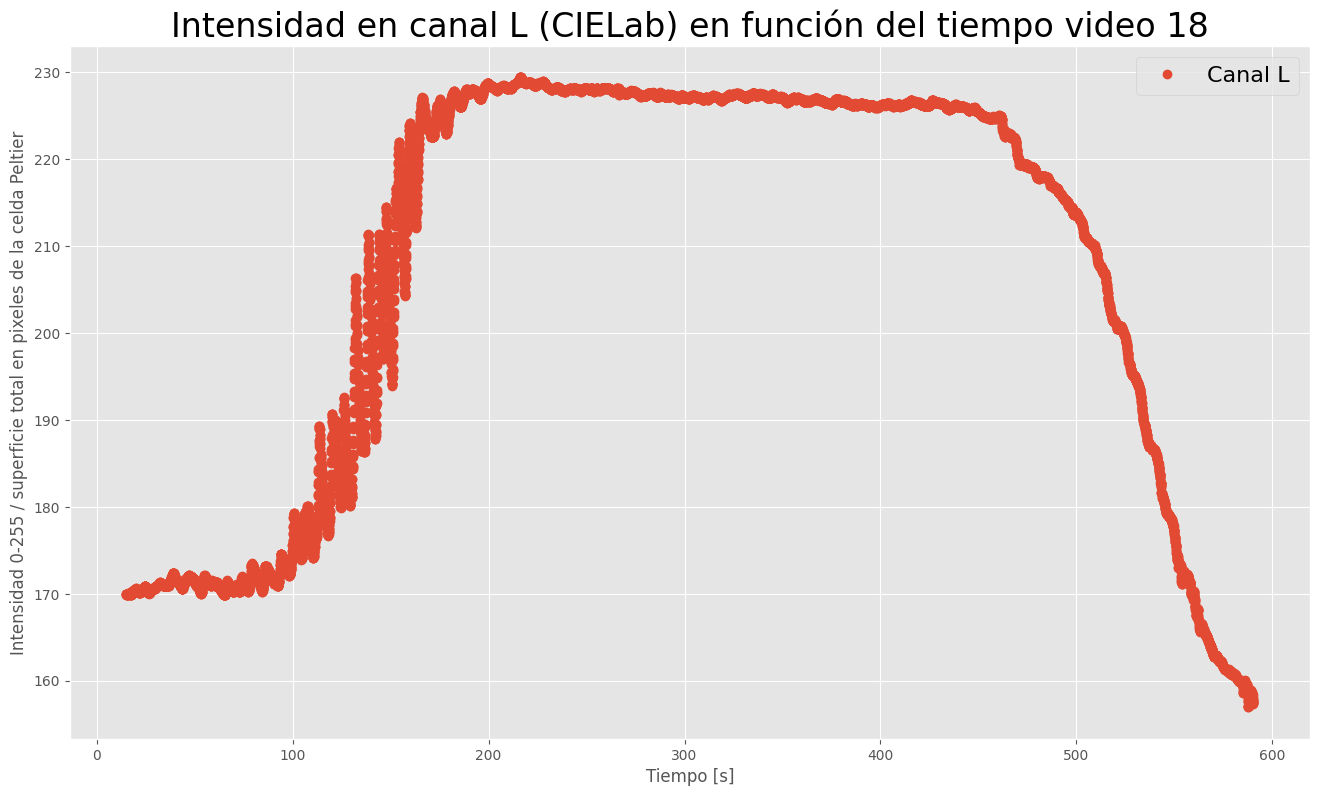

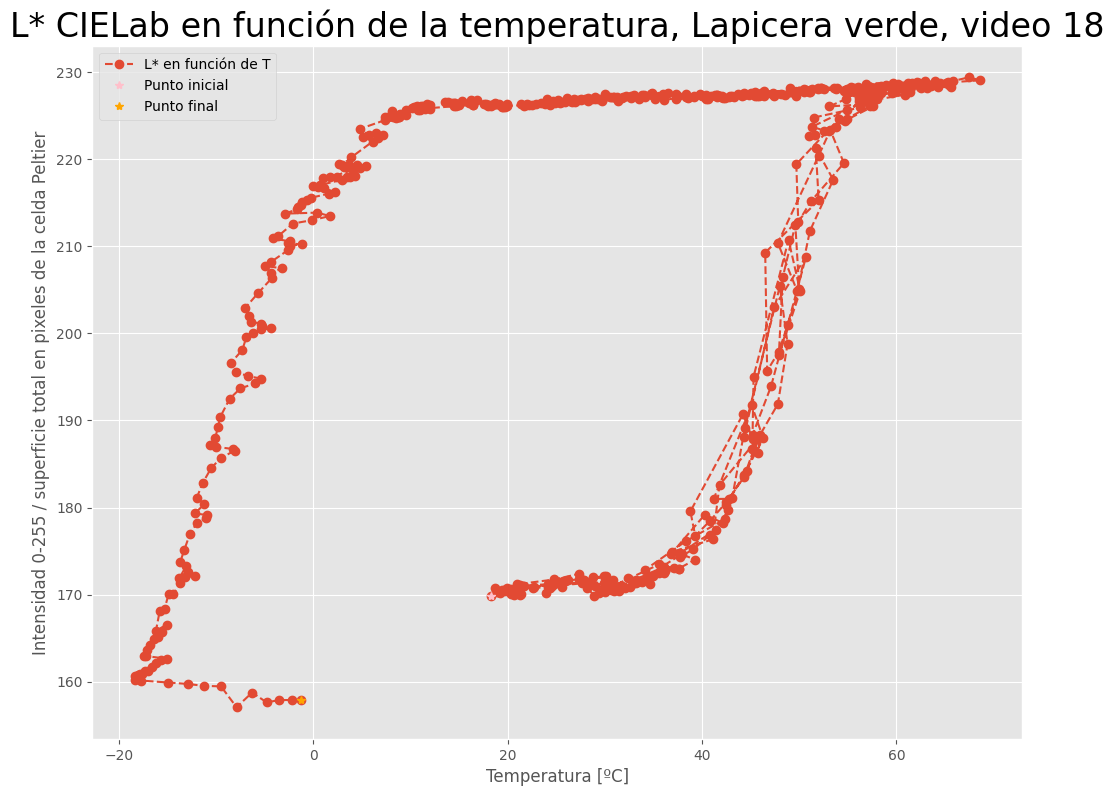

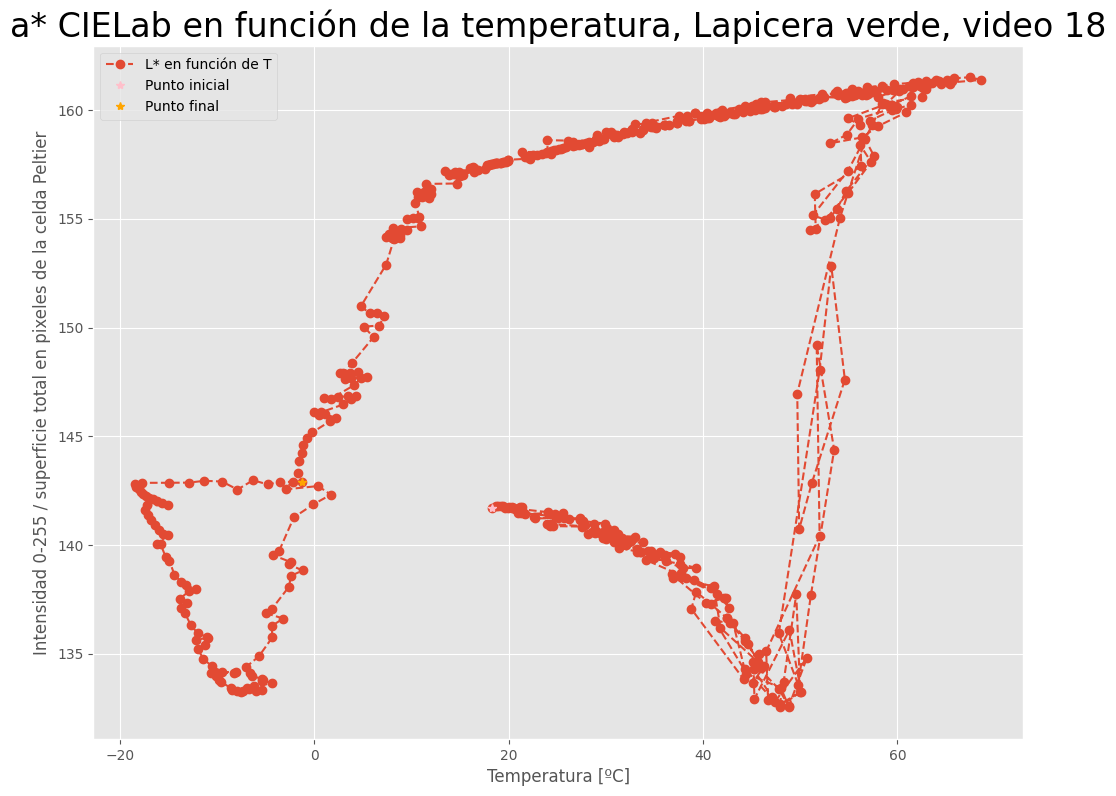

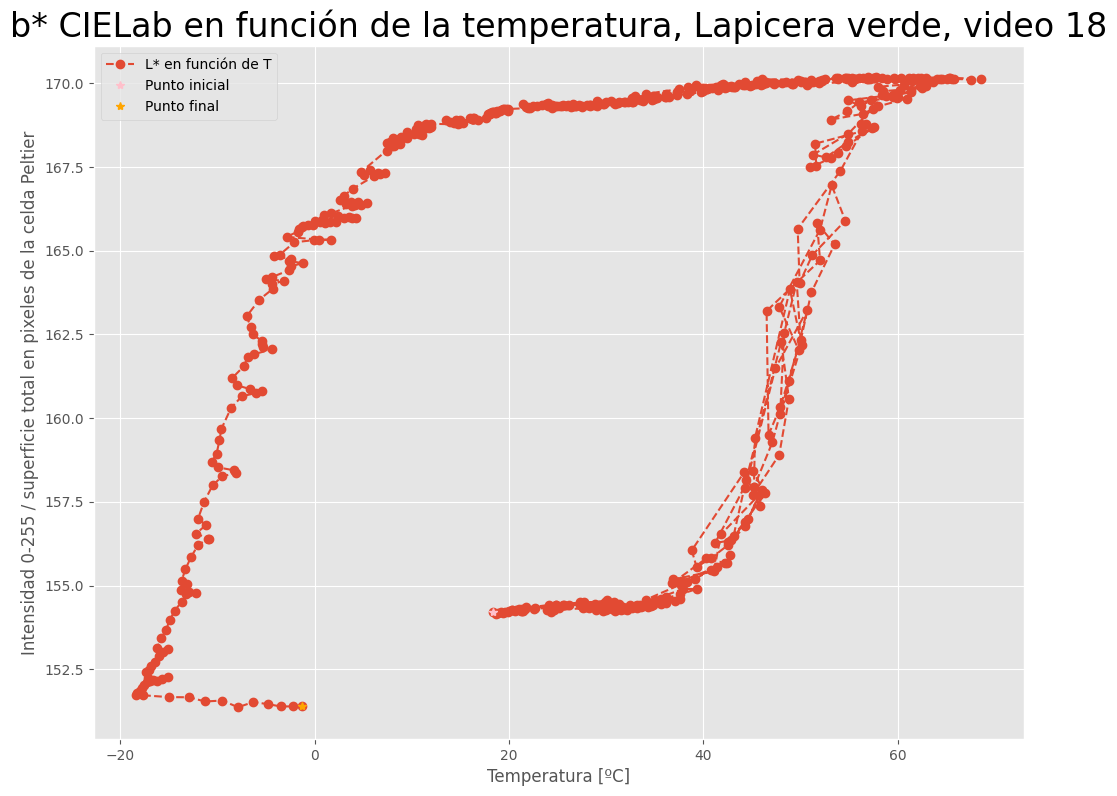

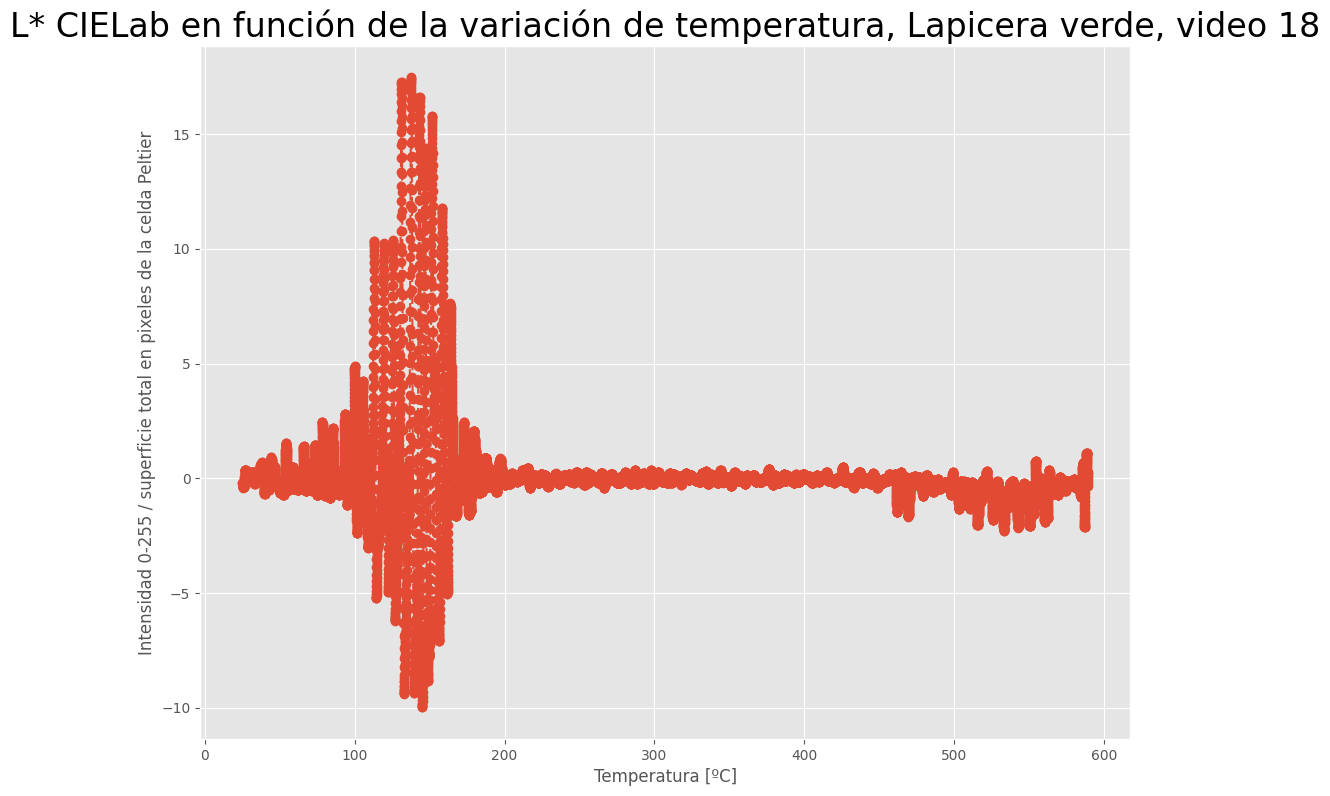

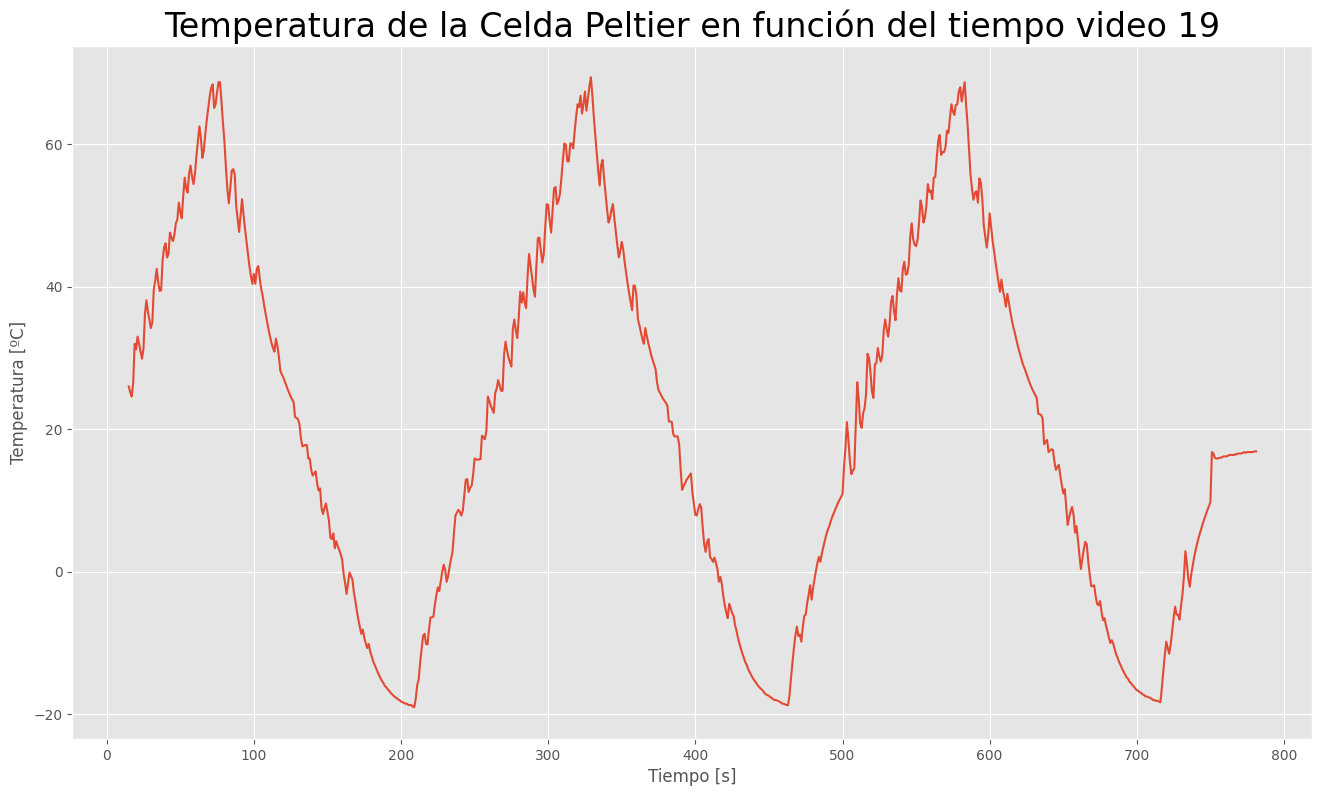

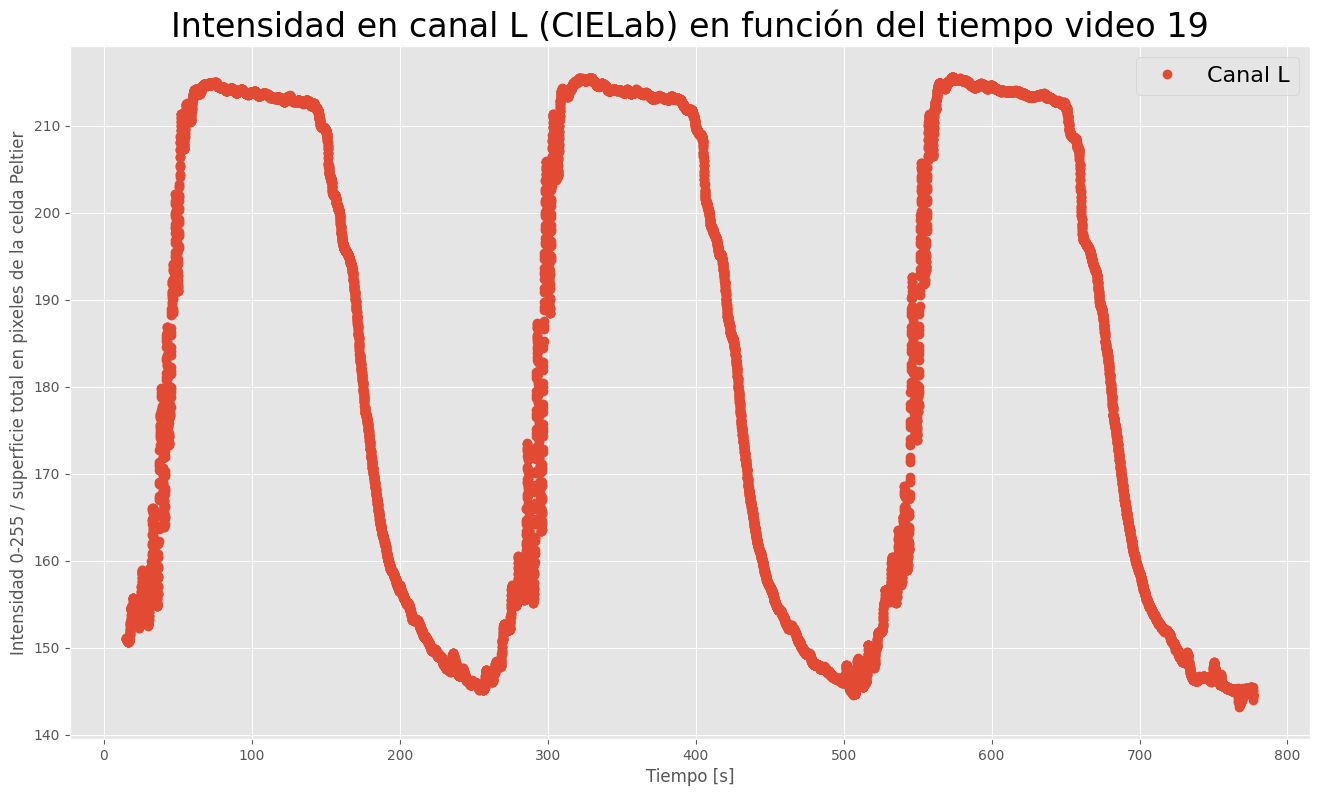

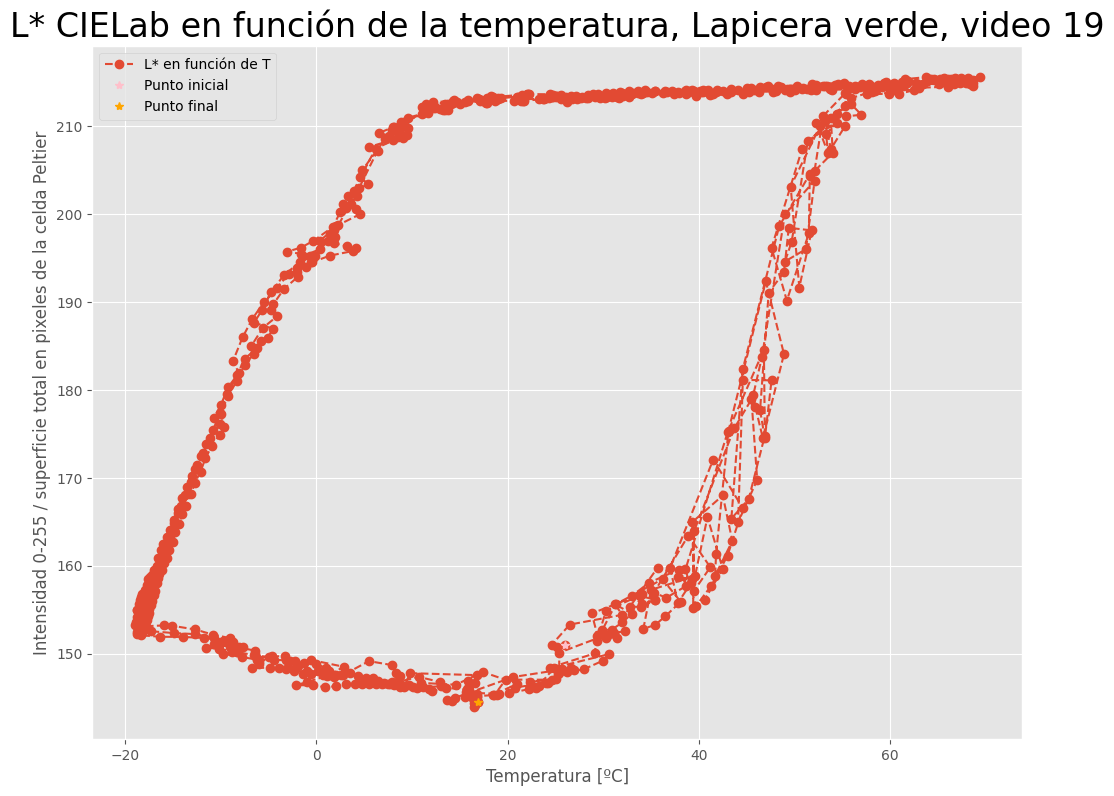

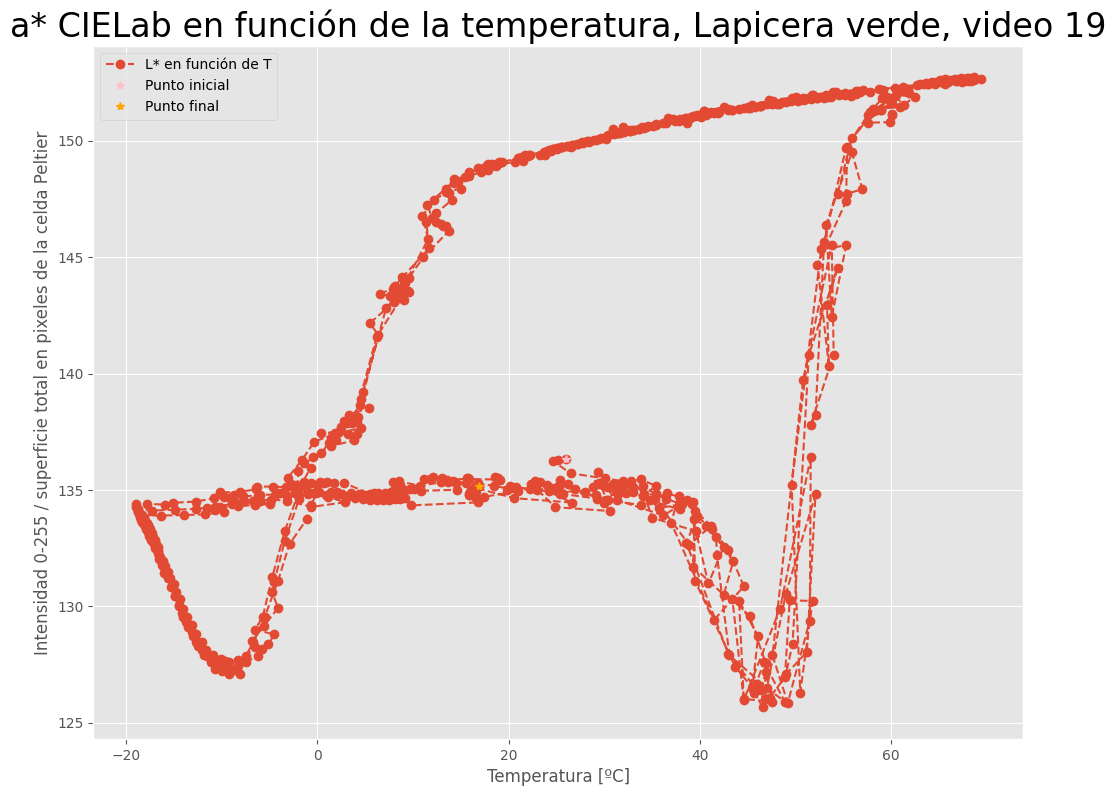

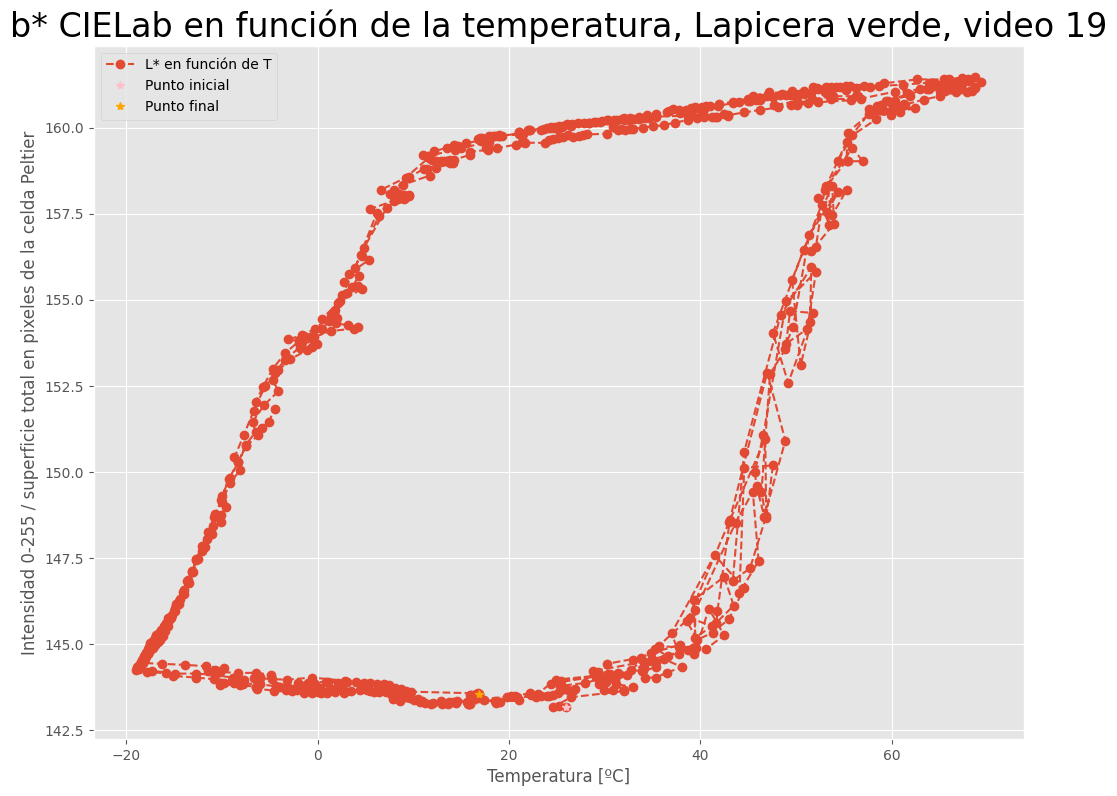

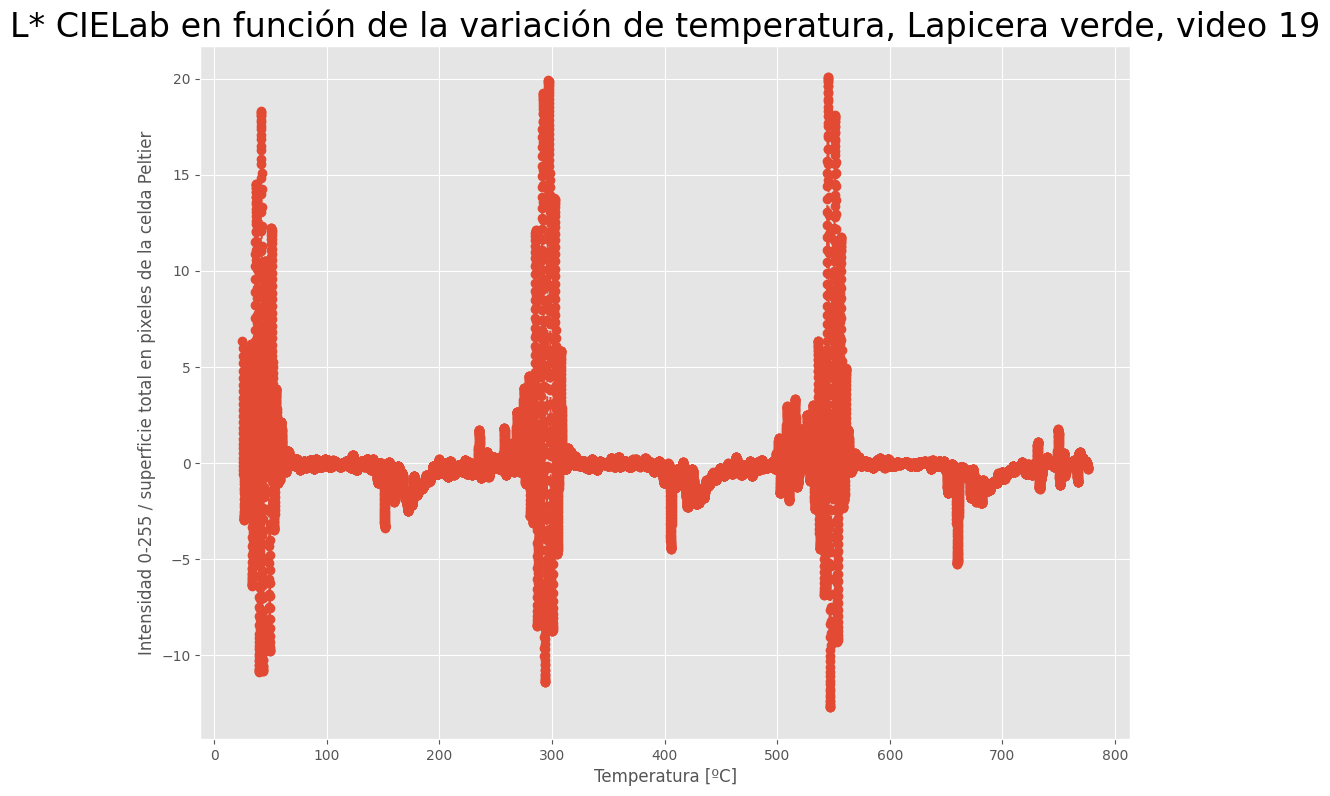

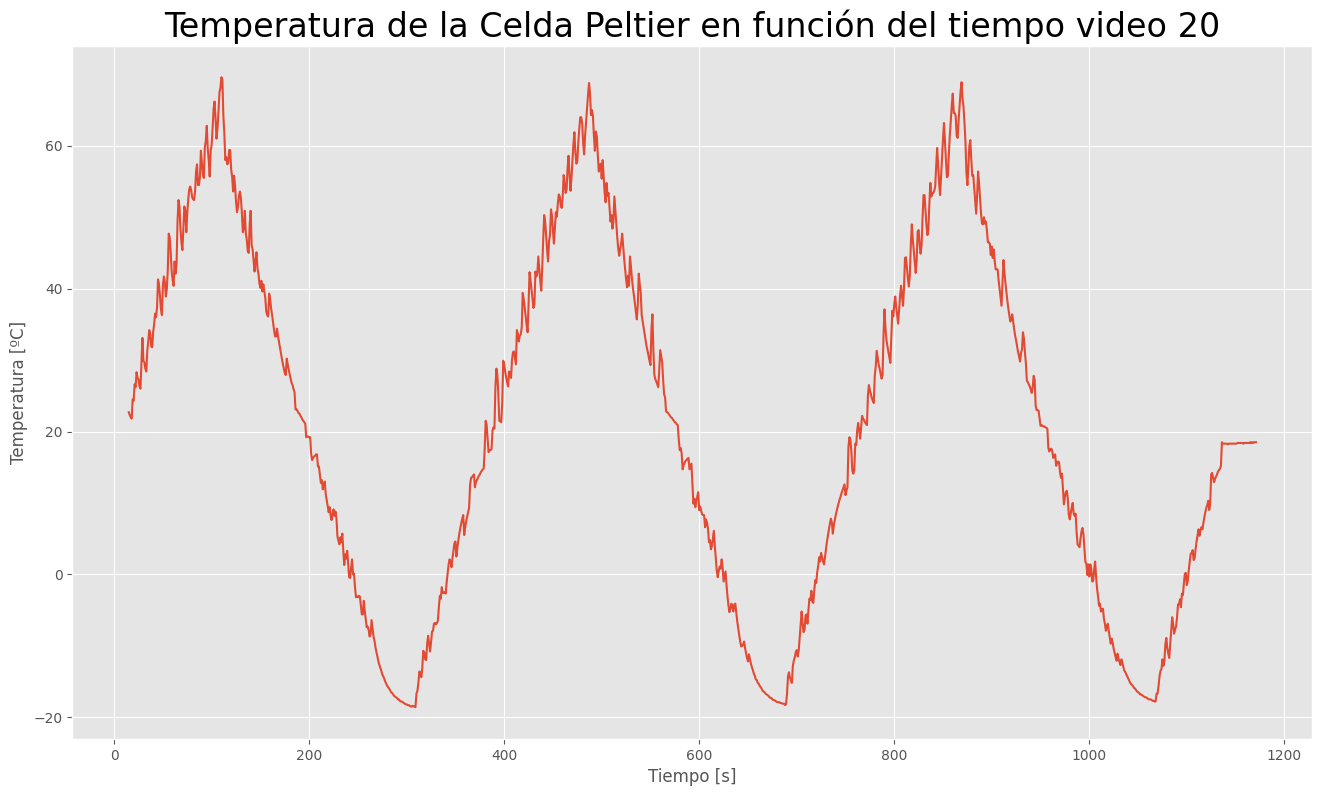

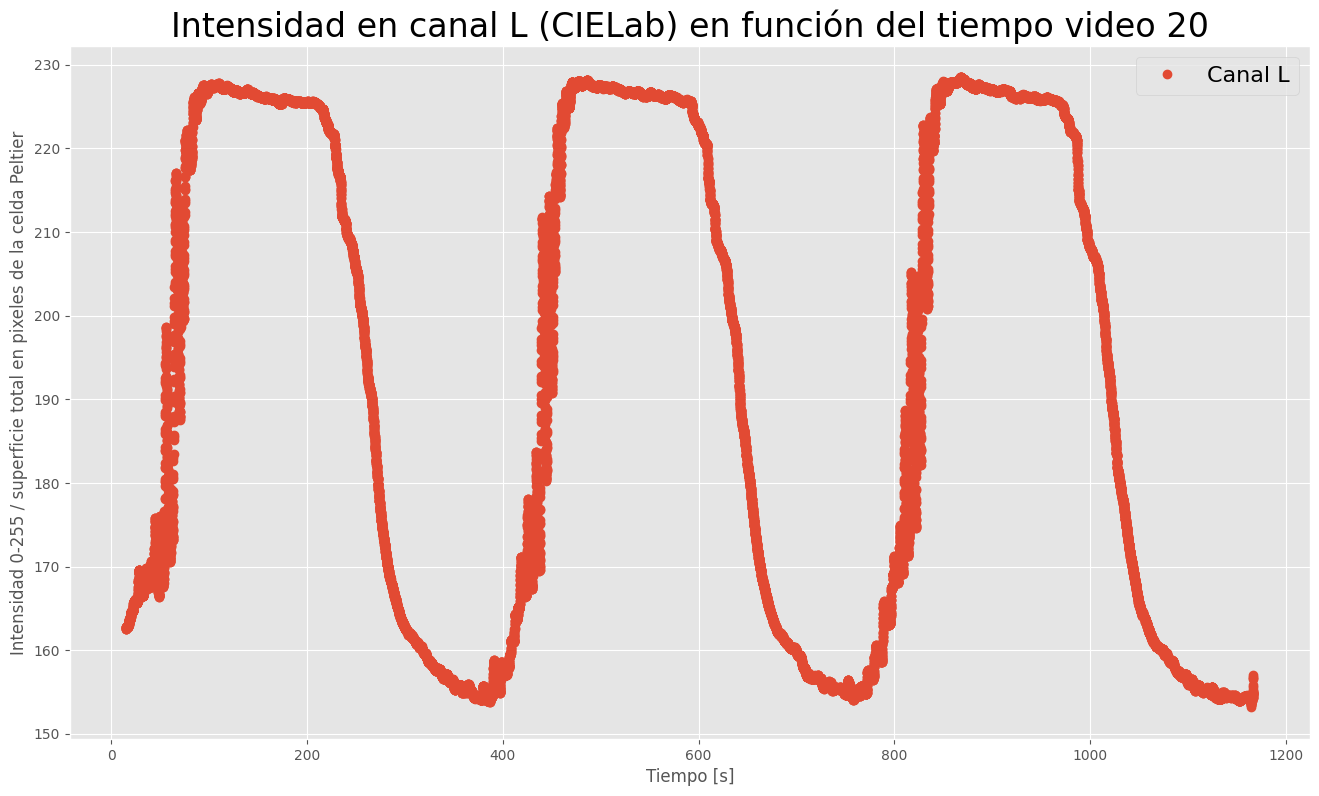

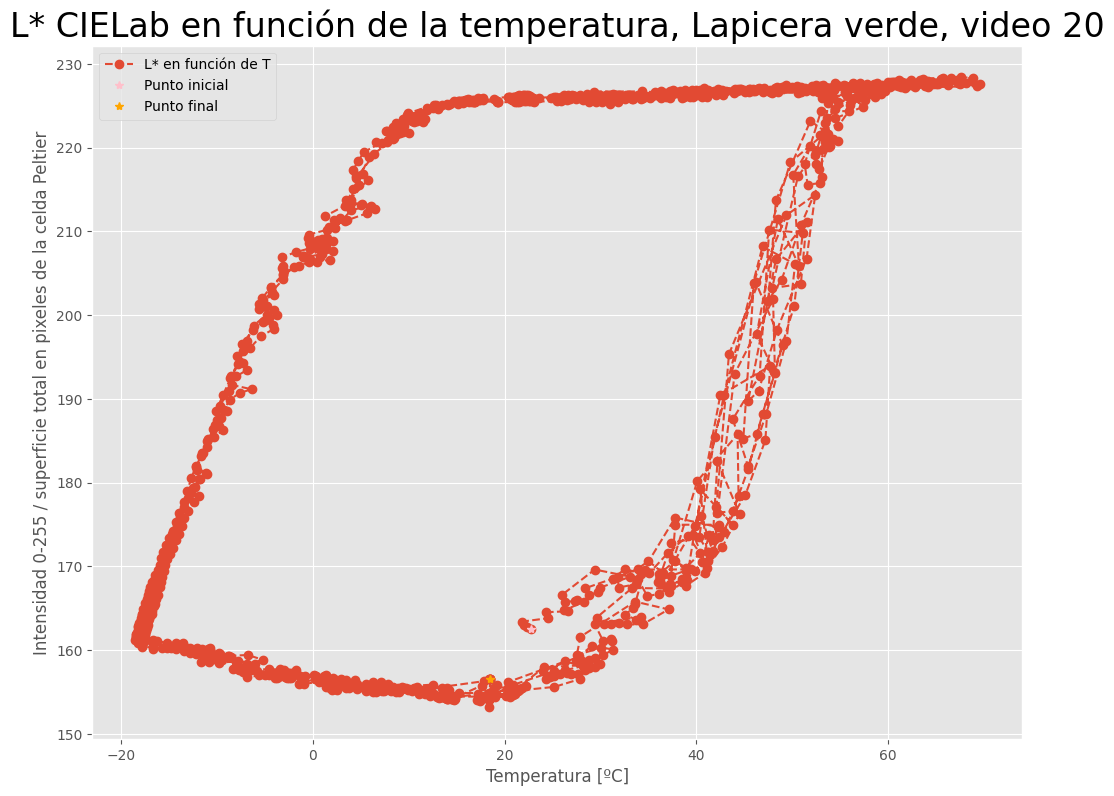

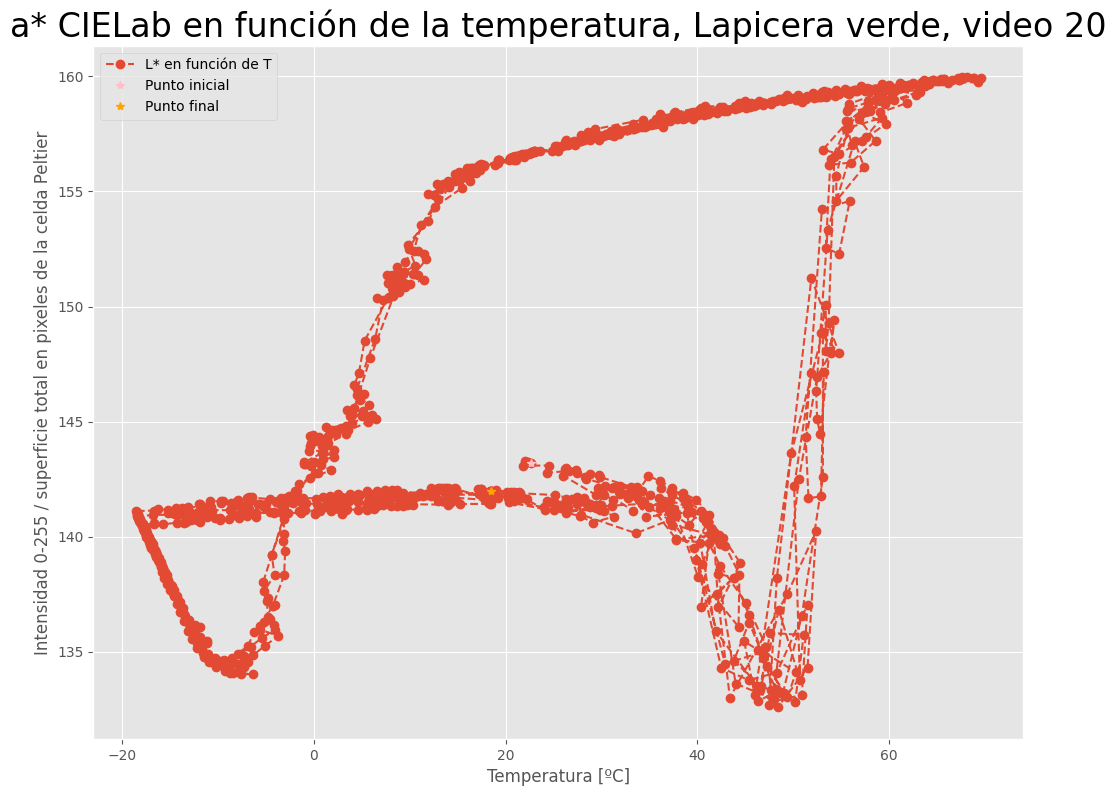

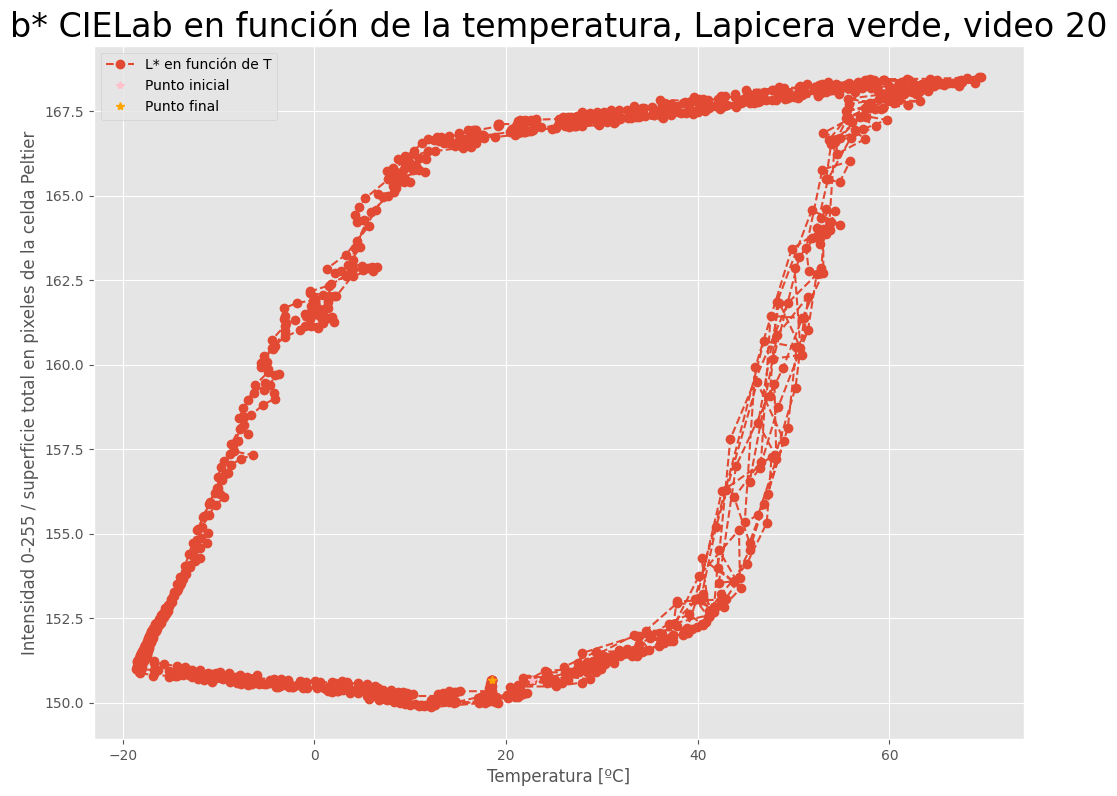

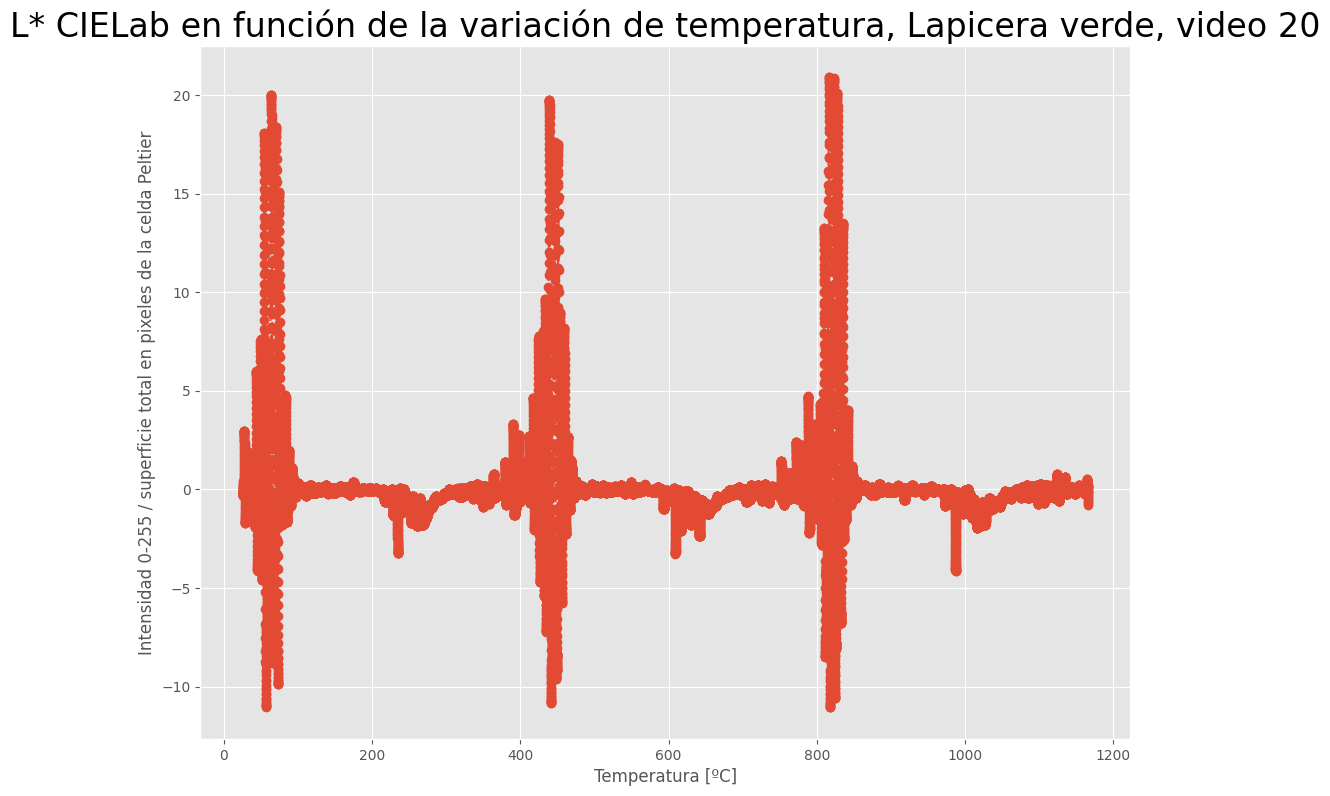

In [23]:
low=17
high=20
dashdash='--'
color = 'verde'
for k in range(low,high+1):
    df=pd.read_csv(f'peltier_cosas/peltiermod{k}.csv')
    t=np.array(range(len(df)))
    df_video=pd.read_csv(f'procesados/video{k}_Lab_sliced_cut.csv')

    pre_skip = 15

    df = df.iloc[pre_skip:]
    df_video = df_video.iloc[pre_skip*25:]
    t = t[pre_skip:]
    
    
    plt.figure(figsize=(16,9))
    plt.title(f'Temperatura de la Celda Peltier en función del tiempo video {k}',fontsize=24)
    plt.plot(t,df['temp'])
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Temperatura [ºC]')
    plt.savefig(f'graficos/Lab/video{k}_tiempo_temperatura.png', bbox_inches='tight', dpi=150)

    plt.figure(figsize=(16,9))
    plt.plot(df_video['t'],df_video['L'],f'o', label=f'Canal L')
    plt.title(f'Intensidad en canal L (CIELab) en función del tiempo video {k}',fontsize=24)
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
    plt.legend(fontsize=16)
    plt.savefig(f'graficos/Lab/video{k}_tiempo_L_CIELab.png', bbox_inches='tight', dpi=150)
    
    for i in ['L','a','b']:
        plt.figure(figsize=(12,9))
        plt.title(f'{i}* CIELab en función de la temperatura, Lapicera {color}, video {k}',fontsize=24)
        plt.xlabel('Temperatura [ºC]')
        plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')
        y=np.interp(t, df_video['t'], df_video[i])
        plt.plot(df['temp'],y, 'o--',label='L* en función de T')

        plt.plot(df['temp'].iloc[0],y[0], '*',label='Punto inicial',color='pink')
        plt.plot(df['temp'].iloc[-1],y[-1], '*',label='Punto final',color='orange')
        
        plt.legend()
        plt.savefig(f'graficos/Lab/video{k}_temperatura_{i}_CIELab.png', bbox_inches='tight', dpi=150)



    plt.figure(figsize=(12,9))
    plt.title(f'L* CIELab en función de la variación de temperatura, Lapicera {color}, video {k}',fontsize=24)
    plt.xlabel('Temperatura [ºC]')
    plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')

    L_t=df_video['t'][10*25:-25]
    L_y=df_video['L'][10*25:-25]

    t_prima=t[10*25:-25]

    L_y_smooth = savgol_filter(L_y,60,5)
    dL_y_smooth = np.gradient(L_y_smooth,L_t)
    dL_y_smooth_smooth = savgol_filter(dL_y_smooth,60,2)        
    
    L_y_interp=np.interp(t_prima, L_t, dL_y_smooth_smooth)
    
    plt.plot(L_t , dL_y_smooth_smooth, 'o--')
    plt.savefig(f'graficos/Lab/video{k}_diff_temperatura_L_CIELab.png', bbox_inches='tight', dpi=150)
    y=0
